## Data Analytics
### Lab 3.
Alicja Bogusz

In [136]:
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True)  # only valid on Windows
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed
Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
CmdStan version 2.31.0 already installed


### Modeling prior predictive distribution

1. Create a Stan model, which will consist of only generated quantites block.

2. In this block define integer variable N for number of trials equal to 50, integer variable y for number of successes and real p for probability of allergic reaction. Remember to use necessary constraints.

3. Assign a prior for p (appropriate random number generator) that will represent our knowledge about typical cases. You can do it either analytically or by using simulations.

4. Sample from binomial distribution, that will use N and sampled p to generate number of allergic reactions y.

5. Generate 1000 samples (pair of p an y) by calling appropriate method in cmdstanpy. Remeber to set fixed_param=True.

In [137]:
model = cmdstanpy.CmdStanModel(stan_file='model_ex1.stan')

samples = model.sample(fixed_param=True, iter_warmup=1000)

p_samples = samples.stan_variable('p')
y_samples = samples.stan_variable('y')
N = samples.stan_variable('N')

result_samples = np.column_stack((p_samples, y_samples))

print(result_samples)


DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:cmd: /content/model_ex1 info
cwd: None
12:50:11 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_ex1', 'id=1', 'random', 'seed=76786', 'output', 'file=/tmp/tmpe2flu_nx/model_ex1jfxdq0ke/model_ex1-20230329125011.csv', 'method=sample', 'num_warmup=1000', 'algorithm=fixed_param']


12:50:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/model_ex1', 'id=1', 'random', 'seed=76786', 'output', 'file=/tmp/tmpe2flu_nx/model_ex1jfxdq0ke/model_ex1-20230329125011.csv', 'method=sample', 'num_warmup=1000', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpe2flu_nx/model_ex1jfxdq0ke/model_ex1-20230329125011.csv
 console_msgs (if any):
	/tmp/tmpe2flu_nx/model_ex1jfxdq0ke/model_ex1-20230329125011_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffe


[[ 0.0238788  1.       ]
 [ 0.089492   2.       ]
 [ 0.458637  20.       ]
 ...
 [ 0.164528   7.       ]
 [ 0.0267069  1.       ]
 [ 0.167643   8.       ]]


6. Compute ratio of allergic reactions for each sample and create a histogram.

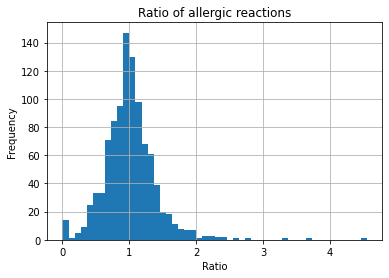

In [138]:
ratio_samples = y_samples / p_samples / N

plt.hist(ratio_samples, bins=50)
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio of allergic reactions')
plt.grid()
plt.show()


7. Verify if mean of the ratio is consistent with prior knowledge, otherwise modify prior parameters. Describe your reasoning in the report

In [139]:
prior_mean_ratio = 0.1  # Expected value of ratio based on prior knowledge
prior_mean_y = prior_mean_ratio * N * 0.5  # Expected value of y based on prior knowledge and assumed probability of 0.5
prior_mean_p = prior_mean_y / N  # Expected value of p based on prior knowledge and assumed probability of 0.5

posterior_mean_ratio = np.mean(ratio_samples)

print('Prior mean ratio:', prior_mean_ratio)
print('Posterior mean ratio:', posterior_mean_ratio)
# print('Expected value of ratio:', prior_mean_y / N)

if abs(posterior_mean_ratio - prior_mean_ratio) > 0.01:
    print('The mean of the ratio is not consistent with prior knowledge.')
else:
    print('The mean of the ratio is consistent with prior knowledge.')

Prior mean ratio: 0.1
Posterior mean ratio: 1.0140904596963225
The mean of the ratio is not consistent with prior knowledge.


### Modeling posterior and posterior predictive distribution

1. Create a Stan model in which:
- N and y are appropriately defined in the data block.
- p is defined in the parameters block.
- binomial likelihood and prior (selected using prior predictive distribution) are defined in the model block.
- new integer variable y_pred in the generated quantities block.
- sample y_pred using values of parameter p and input variable N

2. Generate default number of samples from appropriate method in cmdstanpy.

In [140]:
model = cmdstanpy.CmdStanModel(stan_file='model_ex2.stan')
data = {'N': 50, 'y': 10}
samples = model.sample(data=data) #, fixed_param=True, iter_warmup=1000)
y_pred_samples = samples.stan_variable('y_pred')
print(y_pred_samples)

DEBUG:cmdstanpy:found newer exe file, not recompiling
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe2flu_nx/13r6eazp.json
DEBUG:cmdstanpy:cmd: /content/model_ex2 info
cwd: None
12:50:12 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_ex2', 'id=2', 'random', 'seed=41180', 'data', 'file=/tmp/tmpe2flu_nx/13r6eazp.json', 'output', 'file=/tmp/tmpe2flu_nx/model_ex2r75g36tn/model_ex2-20230329125012_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_ex2', 'id=1', 'random', 'seed=41180', 'data', 'file=/tmp/tmpe2flu_nx/13r6eazp.json', 'output', 'file=/tmp/tmpe2flu_nx/model_ex2r75g36tn/model_ex2-20230329125012_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model_ex2', 'id=3', 'random', 'seed=41180', 'data', 'file=/tmp/tmpe2flu_nx/13r6eazp.json', 'output', 'file=/tmp/tmpe2flu_nx/model_ex2r75g36tn/model_ex2-20230329125012_3.csv', 'method=sample', 'algorithm=hm

12:50:12 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model_ex2', 'id=1', 'random', 'seed=41180', 'data', 'file=/tmp/tmpe2flu_nx/13r6eazp.json', 'output', 'file=/tmp/tmpe2flu_nx/model_ex2r75g36tn/model_ex2-20230329125012_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpe2flu_nx/model_ex2r75g36tn/model_ex2-20230329125012_1.csv
 console_msgs (if any):
	/tmp/tmpe2flu_nx/model_ex2r75g36tn/model_ex2-20230329125012_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
     


[3. 8. 0. ... 2. 6. 3.]


3. Compute ratio of predicted allergic reactions for each sample and create a histogram.

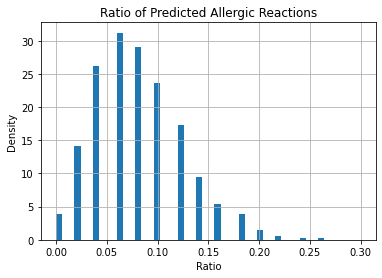

In [141]:
y_pred_ratios  = y_pred_samples / data['N']

# Create a histogram of the ratios
plt.hist(y_pred_ratios , bins=50, density=True)
plt.xlabel('Ratio')
plt.ylabel('Density')
plt.title('Ratio of Predicted Allergic Reactions')
plt.grid()
plt.show()


4. Compute the expected value and 94% density interval of the predicted ratio, compare it with expected value and 94% density interval of parameter p. Use arviz package.

In [142]:
# Compute the expected value and 94% density interval of the predicted ratio
y_pred_mean = y_pred_ratios.mean()
y_pred_ci = az.hdi(y_pred_ratios, hdi_prob=0.94)

# Compute the expected value and 94% density interval of the parameter p
p_mean = p_samples.mean()
p_ci = az.hdi(p_samples, hdi_prob=0.94)

# Print the results
print('Predicted ratio: {:.3f} (94% CI: [{:.3f}, {:.3f}])'.format(y_pred_mean, y_pred_ci[0], y_pred_ci[1]))
print('Parameter p: {:.3f} (94% CI: [{:.3f}, {:.3f}])'.format(p_mean, p_ci[0], p_ci[1]))


Predicted ratio: 0.080 (94% CI: [0.000, 0.160])
Parameter p: 0.207 (94% CI: [0.015, 0.418])


5. Compute the probability that ratio is lower than the average probability from traditional vaccines (count the number of simulated ratios that are smaller).

In [143]:
# Define prior knowledge about the average probability of allergic reactions from traditional vaccines
avg_prob = 7/50

# Compute the number of simulated ratios that are smaller than the average probability
num_smaller = np.sum(y_pred_ratios < avg_prob)

# Compute the probability that the ratio is lower than the average probability
prob_smaller = num_smaller / len(y_pred_ratios)
print(prob_smaller)
# Print the result
print('Probability that ratio is lower than the average probability from traditional vaccines: {:.2%}'.format(prob_smaller))


0.87175
Probability that ratio is lower than the average probability from traditional vaccines: 87.17%
